# Singular Value Decomposition


You can read about the singular value decomposition (SVD) in chapter 9 (pgs 81-91) of Tim Chartier's book, *When Life is Linear.* (See library search for free access.)

Let's start by looking at the matrix B given below.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Enter B
B = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9], 
              [10, 11, 0]])
print("B is \n", B, "\n")

# The following command produces the singular value decomposition (SVD) giving 
# B=U@Smat@VH where U is a m x m orthogonal matrix consisting of eigenvectors from B@B*,
# S is a vector of positive singular values ordered from largest to smallest
# Smat will be an m x n diagonal matrix of nonnegative singular values ordered from largest to smallest along the diagonal,
# and an n x n orthogonal matrix V of eigenvectors from B'*B.
# Note: VH is the Hermitian of V, i.e. the conjugate transpose of V, V*

# Check the output of the following command vs Chartier, page 82.

U, S, VH = np.linalg.svd(B, full_matrices = True)

print("U is \n", U, "\n")
print("S is \n", S, "\n")
print("VH is \n", VH, "\n")

# Notice that the results are slightly different. There are no columns of U corresponding to the singular value(s) of zero, 
# because they will not add to the matrix multiplication and are not needed in the reconstruction of B.

# What is happening when we write this decomposition, B = U @ Smat @ VH?

# Since Smat is diagonal, we can think of the matrix multiplication as a sum of a col vector of U times the corresponding 
# row vector of VH also multiplied by the corresponding singular value.

B is 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11  0]] 

U is 
 [[-1.52034339e-01 -2.36890360e-01  8.68390379e-01 -4.08248290e-01]
 [-3.93984098e-01 -3.62587301e-01  2.15963684e-01  8.16496581e-01]
 [-6.35933857e-01 -4.88284243e-01 -4.36463012e-01 -4.08248290e-01]
 [-6.45949085e-01  7.57622534e-01  9.35835246e-02  7.86408629e-17]] 

S is 
 [21.02439948  7.98113115  0.525521  ] 

VH is 
 [[-0.6011586  -0.68810051 -0.40635702]
 [ 0.30960474  0.26823976 -0.91224576]
 [-0.73671788  0.67421445 -0.05178454]] 



In [8]:
# Put singular values into diagonal matrix.
Smat = np.zeros((4,3))
Smat[:3, :3] = np.diag(S)
print(Smat)

[[21.02439948  0.          0.        ]
 [ 0.          7.98113115  0.        ]
 [ 0.          0.          0.525521  ]
 [ 0.          0.          0.        ]]


In [10]:
# (Fully) Reconstruct B via matrix multiplication.
BB = U @ Smat @ VH
print(BB)

[[1.00000000e+00 2.00000000e+00 3.00000000e+00]
 [4.00000000e+00 5.00000000e+00 6.00000000e+00]
 [7.00000000e+00 8.00000000e+00 9.00000000e+00]
 [1.00000000e+01 1.10000000e+01 6.64485192e-15]]


In [12]:
(S[0] * U[:, 0] )

array([ -3.19643068,  -8.28327906, -13.37012745, -13.5806916 ])

In [14]:
S[0]*np.outer(U[:, 0],VH[0,:]) + S[1]*np.outer(U[:, 1],VH[1,:]) + S[2]*np.outer(U[:, 2],VH[2,:])

array([[1.00000000e+00, 2.00000000e+00, 3.00000000e+00],
       [4.00000000e+00, 5.00000000e+00, 6.00000000e+00],
       [7.00000000e+00, 8.00000000e+00, 9.00000000e+00],
       [1.00000000e+01, 1.10000000e+01, 6.60842908e-15]])

In [16]:
# This is what we are going to do to (re)produce the closest rank 1, rank 10, and 
# rank 50 approximations of Albrect Durer Melancholia 
# below, (Figure 9.2 on page 87, Chartier.)

# But first let's look at the Frobenius norm for matrices.

af = np.linalg.norm(B,'fro')
print(af)

22.494443758403985


In [18]:
# Rank 1 approxmation is given by the outer product u1@vh1 multiplied by the correspnding singular value (scaling factor.)

B1 = S[0] * np.outer(U[:,0],VH[0,:])
print("B1 is \n", B1, "\n")

B1 is 
 [[1.92156179 2.19946557 1.29889204]
 [4.97956445 5.69972853 3.3659686 ]
 [8.03756711 9.19999149 5.43304515]
 [8.16414956 9.34488078 5.51860937]] 



In [20]:
# How close is B1, (rank 1 approximation), to B?
# Compute the Frobenius norm of the difference.
np.linalg.norm((B-B1), 'fro')

7.9984140116870766

In [22]:
# What about the rank 2 approx?
B2 = B1 + S[1]*np.outer(U[:, 1], VH[1, :])
print(B2)

[[1.33620665e+00 1.69231726e+00 3.02363226e+00]
 [4.08361266e+00 4.92348107e+00 6.00587721e+00]
 [6.83101867e+00 8.15464489e+00 8.98812215e+00]
 [1.00362319e+01 1.09668421e+01 2.54676943e-03]]


In [24]:
np.linalg.norm((B-B2), 'fro')

0.5255210044485837

In [26]:
# Read in a .jpg of Albrecht Durer's "Melencolia"
# I got this from the following blog
# http://bochesmalas.blogspot.com/2012/09/albrecht-durer.html

A = plt.imread('durerMelencolia.jpg')

#A = np.array(A)
print(A.shape)

(1062, 800, 3)


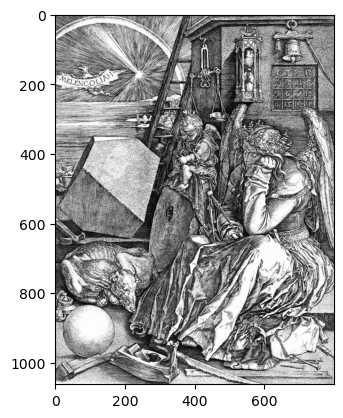

(1062, 800, 3) <class 'numpy.ndarray'>


In [28]:
plt.close('all')
plt.rcParams['figure.dpi'] = 100
plt.imshow(A)
plt.show()

print(A.shape, type(A))

# This image is a rectangular matrix, so we can use the SVD to project this image 
# onto the corresponding u1*s1*v1' to get the first rank approximation (corresponding to the largest singular value.)

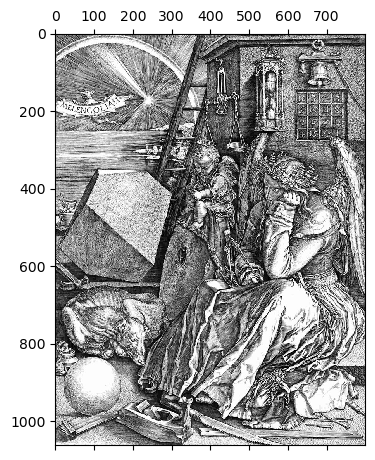

(1062, 800) <class 'numpy.ndarray'>


In [30]:
# These are the weights to form a single grayscale value from RGB values for each pixel.
A_gray = .2989*A[:,:,0]+.5870*A[:,:,1]+.1140*A[:,:,2]

plt.close('all')
plt.rcParams['figure.dpi'] = 100
plt.matshow(A_gray, cmap=plt.get_cmap('gray'))
plt.show()

print(A_gray.shape, type(A_gray))

In [32]:
################################
# MATLAB code (ignore)
#
# First, take the svd of X as we did above (and don't forget the semicolon at the end!):
#
#[U, S, V]=svd(X);
#
# Your rank 1 approximation is
#r1=U(:,1)*S(1,1)*V(:,1)';
################################

In [34]:
# svd using numpy linalg commands
U, S, VH = np.linalg.svd(A_gray, full_matrices=False)

print(U.shape, S.shape, VH.shape)

(1062, 800) (800,) (800, 800)


In [36]:
# magic.
r1 = S[0]*np.outer(U[:,0],VH[0,:])
r1.shape

(1062, 800)

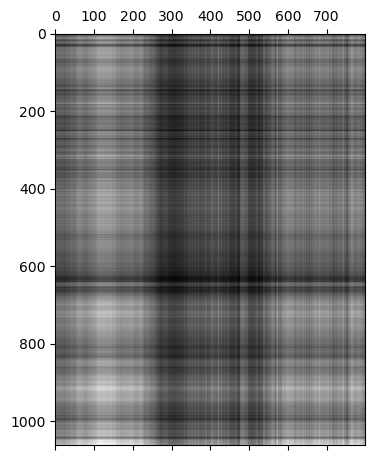

(1062, 800) <class 'numpy.ndarray'> 1


In [38]:
plt.close('all')
plt.rcParams['figure.dpi'] = 100
plt.matshow(r1, cmap=plt.get_cmap('gray'))
plt.show()

print(r1.shape, type(r1), np.linalg.matrix_rank(r1))

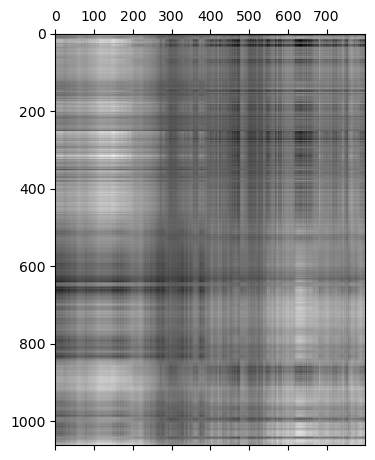

In [40]:
# Successive approximations need to be added together.
# For example,

#r2=U(:,1)*S(1,1)*V(:,1)' + U(:,2)*S(2,2)*V(:,2)';

r2 = r1 + S[1]*np.outer(U[:,1],VH[1,:])
r2.shape

plt.close('all')
plt.rcParams['figure.dpi'] = 100
plt.matshow(r2, cmap=plt.get_cmap('gray'))
plt.show()

In [42]:
# given our properties of orthogonal matrices the rank 2 approx is also equal to
r2 = U[:, :2] @ np.diag(S[:2]) @ VH[:2, :]

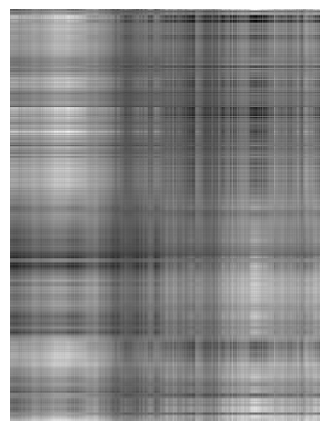

In [44]:
plt.close('all')
plt.rcParams['figure.dpi'] = 100
plt.matshow(r2, cmap=plt.get_cmap('gray'), extent=(0, r2.shape[1]-1, 0, r2.shape[0]-1))
plt.axis('off')
plt.show()

# (This is equation (3) from section 6.3 of Strang (5th edition)).  To do this for the rank 10 or rank 50 would require 
# some effort either manually typing it on the command line or writing a script to loop through each successive projection.  
# Fortunately our matrix mechanics take care of it automatically if we just use the column and row vectors 
# we want in the following matrix form. Why is this?

Do individually, even if helping one another the following.

Show copies of the original image, rank 1, rank 10, and rank 50 approximations. Describe in your own words how these approximations are constructed and how much much information is needed for the reconstruction, relative to the original 1062 x 800 numbers needed for the original image.  Comment on any other observations you have.

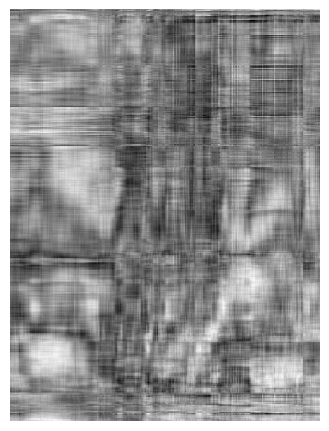

In [47]:
# Your turn

# Calculate r10. Modify the previous code to display your rank 10 approximation.
#r10 = U[:, :10]@np.diag(S[:10])@VH[:10, :]

# put your modified code below
rx = U[:, :10] @ np.diag(S[:10]) @ VH[:10, :]

plt.close('all')
plt.rcParams['figure.dpi'] = 100
plt.matshow(rx, cmap=plt.get_cmap('gray'), extent=(0, rx.shape[1]-1, 0, rx.shape[0]-1))
plt.axis('off')
plt.show()

# COMMENTS:
# Rank 10 gives a little approximation of what the actual image looks like. Since I already know the image,
# it makes a little sense to me about what the image actually looks like. But looking at the image without
# context might make no sense at all.

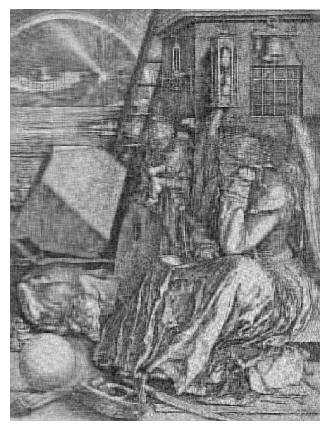

In [49]:
# Modify the your above code to produce the rank 50 approximation. 
# Put in this new code cell leaving your r10 results!

rx = U[:, :50] @ np.diag(S[:50]) @ VH[:50, :]

plt.close('all')
plt.rcParams['figure.dpi'] = 100
plt.matshow(rx, cmap=plt.get_cmap('gray'), extent=(0, rx.shape[1]-1, 0, rx.shape[0]-1))
plt.axis('off')
plt.show()

# COMMENTS:
# The rank 50 shows somewhat clear image. It is very understandable level image and anybody with no prior context
# will also understand what the image is a little bit. However, at this level, it is not quite clear to show the 
# clarity of the text written in the background. As we are adding more and more levels, it is getting more clearer.